Install required library

In [ ]:
!pip install fbprophet

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from fbprophet import Prophet
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Getting the data

In [2]:
Data = pd.read_excel('SACovidData.xlsx')

In [3]:
Data.head(6)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,ZAF,Africa,South Africa,2020-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,0.001,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,60041996,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,NaN,NaN,NaN,NaN
1,ZAF,Africa,South Africa,2020-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,60041996,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,NaN,NaN,NaN,NaN
2,ZAF,Africa,South Africa,2020-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,60041996,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,1573.2,2.81,8.1,26.201661
3,ZAF,Africa,South Africa,2020-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,60041996,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,NaN,NaN,NaN,NaN
4,ZAF,Africa,South Africa,2020-02-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,0.001,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,60041996,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,NaN,NaN,NaN,NaN
5,ZAF,Africa,South Africa,2020-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,60041996,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,NaN,NaN,NaN,NaN


CLeanng the data

In [4]:
#Having a look at all the column names we have
Data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
#Droping the columns that we do not need for predicton,
#The reamaining columns will be the features for prediction

data1 = Data.drop(['iso_code','continent', 'location', 'new_cases_smoothed', 'new_deaths_smoothed', 
          'total_cases_per_million','new_cases_per_million', 'new_cases_smoothed_per_million',
           'total_deaths_per_million', 'new_deaths_per_million','new_deaths_smoothed_per_million',
           'reproduction_rate','total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand','new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred','new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed','new_people_vaccinated_smoothed_per_hundred',
        'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million',
        'tests_units'
          ], axis = 1)

In [6]:
#replacing null values with zeros
data2 = data1.fillna(0)
data2.tail(6)

,date,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
669,2021-12-07,3051222.0,13147.0,90002.0,27.0,52890.0,19838883.0,0.2299,4.4,26639293.0,18053081.0,15104933.0,0.0,148877.0,0.0,60041996,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,0.0,0.0,0.0,0.0
670,2021-12-08,3071064.0,19842.0,90038.0,36.0,73911.0,19912794.0,0.2461,4.1,26781642.0,18157324.0,15182986.0,0.0,142349.0,0.0,60041996,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,0.0,0.0,0.0,0.0
671,2021-12-09,3093452.0,22388.0,90060.0,22.0,75251.0,19988045.0,0.2583,3.9,0.0,0.0,0.0,0.0,0.0,0.0,60041996,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,0.0,0.0,0.0,0.0
672,2021-12-10,3112469.0,19017.0,90080.0,20.0,83515.0,20071560.0,0.2547,3.9,27043034.0,18344024.0,15330635.0,0.0,0.0,0.0,60041996,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,0.0,0.0,0.0,0.0
673,2021-12-11,3129622.0,17153.0,90116.0,36.0,104831.0,20176391.0,0.2364,4.2,0.0,0.0,0.0,0.0,0.0,0.0,60041996,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,0.0,0.0,0.0,0.0
674,2021-12-12,3167497.0,37875.0,90137.0,21.0,62414.0,20238805.0,0.2847,3.5,0.0,0.0,0.0,0.0,0.0,0.0,60041996,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,0.0,0.0,0.0,0.0


In [7]:
from datetime import datetime
data2.date = pd.to_datetime(data2.date, format = '%Y-%m-%d')
data3 = data2[['date', 'new_cases']]
data4 = data2[['date', 'new_cases']]
#Transform dataframe into a time series
data3.set_index('date', inplace = True)
data3

,new_cases
date,
2020-02-07,0.0
2020-02-08,0.0
2020-02-09,0.0
2020-02-10,0.0
2020-02-11,0.0
...,...
2021-12-08,19842.0
2021-12-09,22388.0
2021-12-10,19017.0


Visualize the data

<Figure size 432x288 with 0 Axes>

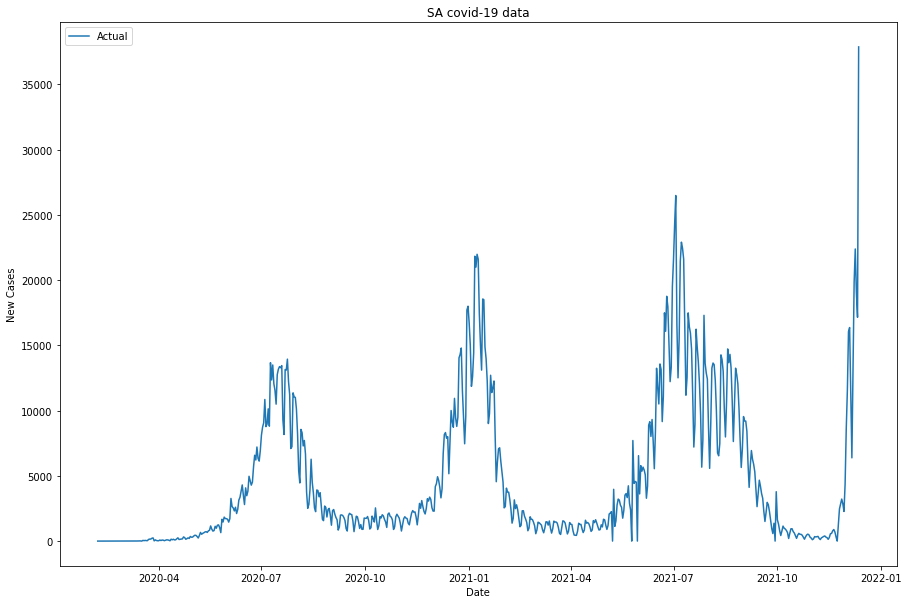

In [8]:
plt.figure(1)
plt.figure(figsize=(15, 10))
plt.title('SA covid-19 data')
plt.plot(data3, label ="Actual")
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend(loc = 'upper left')
plt.show()

Prophet Model

In [9]:
data4.dtypes

date         datetime64[ns]
new_cases           float64
dtype: object

In [10]:
ds = data4.date
ds

0     2020-02-07
1     2020-02-08
2     2020-02-09
3     2020-02-10
4     2020-02-11
         ...    
670   2021-12-08
671   2021-12-09
672   2021-12-10
673   2021-12-11
674   2021-12-12
Name: date, Length: 675, dtype: datetime64[ns]

In [11]:
data4.columns =['ds', 'y']

In [12]:
data4.head()

,ds,y
0,2020-02-07,0.0
1,2020-02-08,0.0
2,2020-02-09,0.0
3,2020-02-10,0.0
4,2020-02-11,0.0


Train the model

In [13]:
m = Prophet(interval_width = 0.99, yearly_seasonality=True)
model = m.fit(data4)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecast

In [14]:
future = m.make_future_dataframe(periods=100, freq='D')

In [15]:
forecast= m.predict(future)

In [16]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
770,2022-03-18,7364.367895,-2486.634687,9146.815981,6907.901274,7779.131972,-3788.590291,-3788.590291,-3788.590291,725.173232,725.173232,725.173232,-4513.763524,-4513.763524,-4513.763524,0.0,0.0,0.0,3575.777604
771,2022-03-19,7366.287879,-3015.049950,9428.742875,6902.168381,7790.606018,-3940.667147,-3940.667147,-3940.667147,546.840879,546.840879,546.840879,-4487.508026,-4487.508026,-4487.508026,0.0,0.0,0.0,3425.620733
772,2022-03-20,7368.207864,-2718.670498,8886.081307,6896.435488,7800.232518,-4656.694128,-4656.694128,-4656.694128,-203.734208,-203.734208,-203.734208,-4452.959921,-4452.959921,-4452.959921,0.0,0.0,0.0,2711.513736
773,2022-03-21,7370.127848,-4221.887151,7656.603467,6890.702595,7808.414259,-5925.275939,-5925.275939,-5925.275939,-1513.660018,-1513.660018,-1513.660018,-4411.615921,-4411.615921,-4411.615921,0.0,0.0,0.0,1444.851909
774,2022-03-22,7372.047833,-4143.327224,7831.219247,6884.969702,7816.595999,-5443.289235,-5443.289235,-5443.289235,-1078.141283,-1078.141283,-1078.141283,-4365.147952,-4365.147952,-4365.147952,0.0,0.0,0.0,1928.758598


Text(39.25, 0.5, 'Daily Cases')

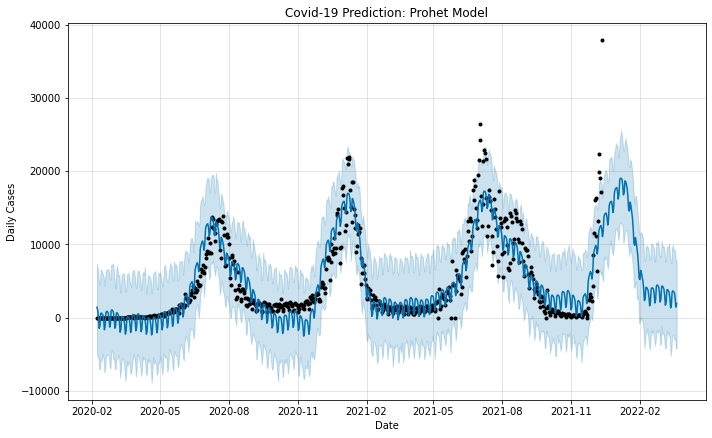

In [19]:
plot1 = m.plot(forecast)
plt.title('Covid-19 Prediction: Prohet Model')
plt.xlabel('Date')
plt.ylabel('Daily Cases')

#The prophet model doesnt do well with increasing peak gradient

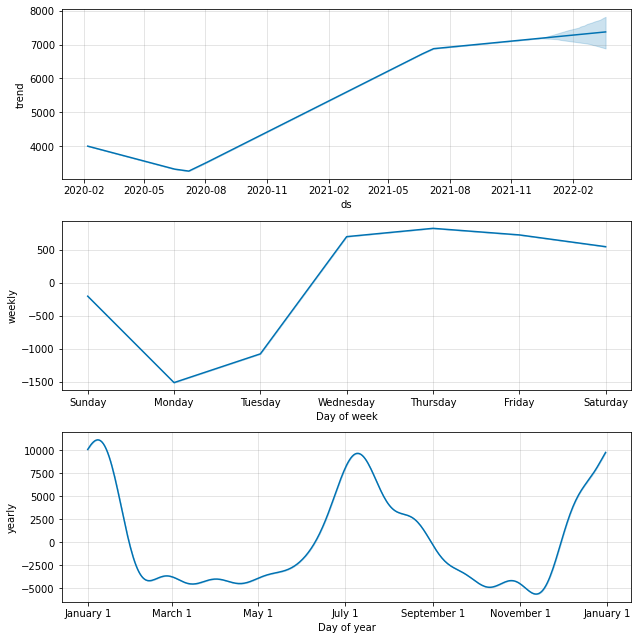

In [18]:
plt2 = m.plot_components(forecast)